In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Entire_home_apt.csv
# id_neighbordhood_date.csv

df=pd.read_csv('../Final/Berlin/merge_data_files/Entire_home_apt_5y.csv' ,low_memory=False,index_col=0) 
df

,id,latitude,longitude,listing_url,host_id,host_name,host_since,host_location,room_type,neighbourhood_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location.1,review_scores_value,calculated_host_listings_count,cleaning_fee,date
0,4712991,52.602404,13.327644,https://www.airbnb.com/rooms/4712991,24354535,Ulli,2014-12-01,"Berlin, Berlin, Germany",Entire home/apt,MV 2,...,90.0,9.0,9.0,10.0,10.0,9.0,9.0,1,$35.00,2016-05-03
1,62613,52.497286,13.422967,https://www.airbnb.com/rooms/62613,227954,Flat,2010-09-08,"Berlin, Berlin, Germany",Entire home/apt,südliche Luisenstadt,...,88.0,9.0,9.0,10.0,9.0,10.0,9.0,2,$30.00,2016-05-03
2,7861432,52.498663,13.440583,https://www.airbnb.com/rooms/7861432,41435327,Simon,2015-08-14,"Berlin, Berlin, Germany",Entire home/apt,südliche Luisenstadt,...,80.0,10.0,10.0,8.0,8.0,10.0,10.0,1,NaN,2016-05-03
3,10679486,52.494757,13.434236,https://www.airbnb.com/rooms/10679486,9697147,Cristina,2013-10-29,"Berlin, Berlin, Germany",Entire home/apt,südliche Luisenstadt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2016-05-03
7,3437131,52.499368,13.440215,https://www.airbnb.com/rooms/3437131,17322607,Claudio,2014-06-27,"Berlin, Berlin, Germany",Entire home/apt,südliche Luisenstadt,...,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1,$15.00,2016-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108128,28828201,52.498390,13.326640,https://www.airbnb.com/rooms/28828201,34895928,Lara,2015-06-03,"Berlin, Berlin, Germany",Entire home/apt,Düsseldorfer Straße,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2,$15.00,2020-05-14
108129,28828410,52.433930,13.322800,https://www.airbnb.com/rooms/28828410,1509514,Andrea,2011-12-16,"Berlin, Berlin, Germany",Entire home/apt,Ostpreußendamm,...,96.0,10.0,10.0,10.0,10.0,9.0,9.0,2,$40.00,2020-05-14
108130,28828802,52.548410,13.402220,https://www.airbnb.com/rooms/28828802,8389055,Sarah,2013-08-25,"Berlin, Berlin, Germany",Entire home/apt,Prenzlauer Berg Nordwest,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,$40.00,2020-05-14
108132,28848356,52.481030,13.444910,https://www.airbnb.com/rooms/28848356,217529245,Conny,2018-09-27,"Berlin, Berlin, Germany",Entire home/apt,Rixdorf,...,93.0,9.0,9.0,9.0,9.0,10.0,9.0,1,$40.00,2020-05-14


In [3]:

df.loc[df.date=='2020-05-14'].host_id.nunique()

10601

In [4]:
#find the top 20 districts

top15=df.loc[df.date=='2020-05-14']['neighbourhood_cleansed'].value_counts()[:15].index.tolist()
top15

['Alexanderplatz',
 'Frankfurter Allee Süd FK',
 'Brunnenstr. Süd',
 'Tempelhofer Vorstadt',
 'Reuterstraße',
 'Prenzlauer Berg Nordwest',
 'Prenzlauer Berg Südwest',
 'Prenzlauer Berg Süd',
 'Frankfurter Allee Nord',
 'Rixdorf',
 'Schillerpromenade',
 'südliche Luisenstadt',
 'Helmholtzplatz',
 'Neuköllner Mitte/Zentrum',
 'Schöneberg-Nord']

In [5]:
df2=df.groupby(['neighbourhood_cleansed','date'],as_index=False).count()[['neighbourhood_cleansed','date','id']]

In [6]:
df2=df2.sort_values(by=['id'], ascending=False)
df2.date = pd.to_datetime(df2.date, format='%Y-%m-%d')

In [7]:
df2.dtypes

neighbourhood_cleansed            object
date                      datetime64[ns]
id                                 int64
dtype: object

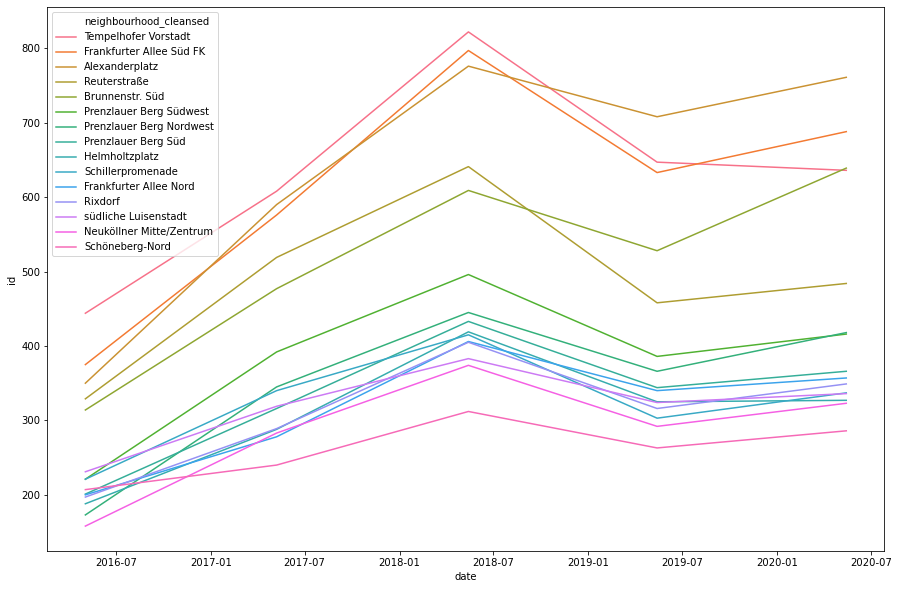

In [8]:
toplot=df2.loc[df2['neighbourhood_cleansed'].isin(top15)]

plt.figure(figsize=(15, 10)) 

sns.lineplot(data=toplot, x="date", y="id", hue="neighbourhood_cleansed")

In [9]:
#find the top 20 hots

top20=df.loc[df.date=='2020-05-14']['host_id'].value_counts()[:30].index.tolist()
top20

[1625771,
 335573202,
 210700814,
 87442687,
 8912086,
 260004354,
 115791256,
 108025548,
 23904144,
 265635773,
 3003519,
 193643890,
 79430806,
 1210739,
 12360,
 4032095,
 302404,
 52747435,
 190957759,
 1496069,
 309128523,
 97902707,
 155105708,
 84512703,
 73158,
 278539159,
 27952946,
 167067226,
 718939,
 1194258]

In [10]:
df3=df.groupby(['host_id','date'],as_index=False).count()[['host_id','date','id']]

In [11]:
df3=df3.sort_values(by=['id'], ascending=False)
df3.date = pd.to_datetime(df3.date, format='%Y-%m-%d')

In [12]:
toplot=df3.loc[df3['host_id'].isin(top20)]

In [13]:
toplot

,host_id,date,id
3681,1625771,2020-05-14,58
3680,1625771,2019-05-14,46
48127,335573202,2020-05-14,44
46380,210700814,2020-05-14,39
3679,1625771,2018-05-14,38
...,...,...,...
35450,52747435,2018-05-14,2
7970,4032095,2016-05-03,1
2446,1194258,2016-05-03,1
2521,1210739,2016-05-03,1


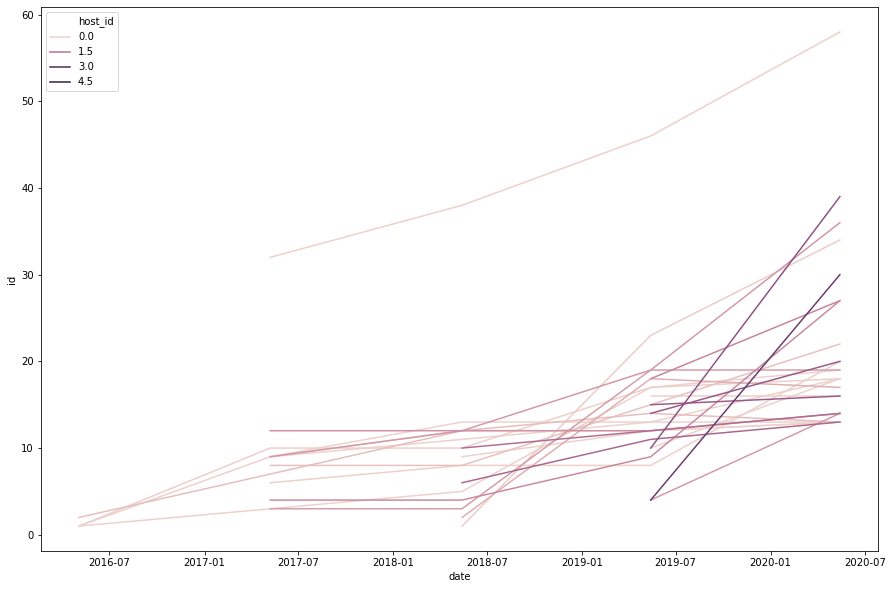

In [14]:
toplot=df3.loc[df3['host_id'].isin(top20)]

plt.figure(figsize=(15, 10)) 



sns.lineplot(data=toplot, x="date", y="id", hue='host_id', markers=True, dashes=False)

In [15]:
toplot=df3.copy()

bins = [0,1,2,4,8,16,260]

toplot['binned'] = pd.cut(toplot['id'], bins)



toplot

,host_id,date,id,binned
3681,1625771,2020-05-14,58,"(16, 260]"
3680,1625771,2019-05-14,46,"(16, 260]"
48127,335573202,2020-05-14,44,"(16, 260]"
38560,75140172,2018-05-14,40,"(16, 260]"
46380,210700814,2020-05-14,39,"(16, 260]"
...,...,...,...,...
16900,11649536,2019-05-14,1,"(0, 1]"
16901,11649536,2020-05-14,1,"(0, 1]"
16902,11649805,2017-05-08,1,"(0, 1]"
16903,11649805,2018-05-14,1,"(0, 1]"


In [16]:
df['binned_calc']=pd.cut(df['calculated_host_listings_count'], bins)

In [17]:
df['binned_calc']=df['binned_calc'].astype(str)

In [18]:
pie_5=df.groupby(['binned_calc','date'],as_index=False).count()[['binned_calc','date','id']]

In [19]:
pie_5.date

0     2016-05-03
1     2017-05-08
2     2018-05-14
3     2019-05-14
4     2020-05-14
5     2016-05-03
6     2017-05-08
7     2018-05-14
8     2019-05-14
9     2020-05-14
10    2016-05-03
11    2017-05-08
12    2018-05-14
13    2019-05-14
14    2020-05-14
15    2016-05-03
16    2017-05-08
17    2018-05-14
18    2019-05-14
19    2020-05-14
20    2016-05-03
21    2017-05-08
22    2018-05-14
23    2019-05-14
24    2020-05-14
25    2016-05-03
26    2017-05-08
27    2018-05-14
28    2019-05-14
29    2020-05-14
Name: date, dtype: object

In [20]:
pie_5.loc[pie_5.date=='2016-05-03']

,binned_calc,date,id
0,"(0, 1]",2016-05-03,5710
5,"(1, 2]",2016-05-03,745
10,"(16, 260]",2016-05-03,3
15,"(2, 4]",2016-05-03,455
20,"(4, 8]",2016-05-03,89
25,"(8, 16]",2016-05-03,52


In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots



fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['2016','2020'])
fig.add_trace(go.Pie(labels=pie_5.loc[pie_5.date=='2016-05-03'].binned_calc, 
                     values=pie_5.loc[pie_5.date=='2016-05-03'].id, scalegroup='one',
                     name="2016"), 1, 1)
fig.add_trace(go.Pie(labels=pie_5.loc[pie_5.date=='2020-05-14'].binned_calc, 
                     values=pie_5.loc[pie_5.date=='2020-05-14'].id, scalegroup='one',
                     name="2020"), 1, 2)

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0), height=600
)

fig.update_layout(title_text='Multiple flat host evolution')
fig.show()
fig.write_html("../Final/Pie_chart_5years.html")

In [23]:
# count the multiple host listings
plot=toplot.groupby(['binned','date'],as_index=False).count()

In [24]:
fig = px.bar(plot, x='date', y='id', labels = {"value": "count", "variable": "medal"},
             color='binned', 
            title='Number of hosts with multiple listings_only_apts')
fig.show()
fig.write_html("../Final/multipleL_host_5years.html")

# plot the multiple flat hosts over time on map

In [25]:
#toplot.loc[
toplot['binned']=toplot['binned'].astype(str)


In [26]:
data2=toplot.loc[toplot['binned'].isin(['(2, 4]','(4, 8]','(8, 16]','(16, 260]'])][['date','host_id','binned']]

In [27]:
df.dtypes

id                                  int64
latitude                          float64
longitude                         float64
listing_url                        object
host_id                             int64
host_name                          object
host_since                         object
host_location                      object
room_type                          object
neighbourhood_cleansed             object
neighbourhood_group_cleansed       object
review_scores_location            float64
price                             float64
last_review                        object
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location.1          float64
review_scores_value               float64
calculated_host_listings_count      int64
cleaning_fee                       object
date                              

In [28]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [29]:
data2.dtypes

date       datetime64[ns]
host_id             int64
binned             object
dtype: object

In [30]:
data=pd.merge(df, data2,  how='left',  on=['host_id','date'])


In [31]:
# clean data for ploting
#df=data.loc[data.binned.notnull()]
df.date=df.date.apply(lambda x: x.strftime('%Y-%m'))

In [37]:
import plotly.figure_factory as ff

# it needs a token for access mapbox
px.set_mapbox_access_token('pk.eyJ1Ijoiam9obnppbnoiLCJhIjoiY2tmbWthazZ6MDNueDJxb2ZyZ2M3czU0dyJ9.Bl3T4kl14xan7glGxid_Rw')


lat = df['latitude']
lon = df['longitude']
frame = df['date']

fig = ff.create_hexbin_mapbox(
    lat=lat, lon=lon, nx_hexagon=50, animation_frame=frame,
    color_continuous_scale="Viridis", labels={"color": "Airbnb listings > 50", "frame": "Period"},
    opacity=0.5, min_count=60, height=500, zoom=10)
    #show_original_data=True, original_data_marker=dict(opacity=0.4, size=3, color="blue"))
fig.update_layout(title={'text': "density spots"})
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

# write to an html file
fig.write_html("../Final/hives_for_density2.html")